In [26]:
import pandas as pd
df=pd.read_json('../helvar-demo/src/assets/kalan_final_data_2.json',orient='index')
devices=pd.read_json('../helvar-demo/src/assets/site_6.json')

In [ ]:
df['timestamp']

In [21]:
df.head()

timestamp  deviceid     nodeid  groupid  groupsize objecttype  \
17     13.355       101  10113.355        1          1              
18     19.382       101  10119.382        2          4              
19     25.855       101  10125.855        2          4              
20     31.393       101  10131.393        2          4              
21     37.035       101  10137.035        2          4              

              x           y  
17  2212.950046  440.668784  
18  2212.950046  440.668784  
19  2212.950046  440.668784  
20  2212.950046  440.668784  
21  2212.950046  440.668784

In [28]:
site = 'site_6'
df_sensor_data = pd.read_pickle(f'./audio_data/{site}.pkl', compression='gzip')
df_device_data=pd.read_json(f'./audio_data/{site}.json')
df_sensor_data.loc[:, 'timestamp'] = (pd.to_datetime(df_sensor_data['timestamp'], utc=True)
                                 .dt.tz_convert('Europe/Helsinki')
                                 .dt.tz_localize(None))

In [23]:
df['objecttype'].unique()

array(['', 'Speech', 'Silence', 'Vehicle', 'Traffic noise, roadway noise'],
      dtype=object)

In [54]:
df = pd.read_json('matlabin_ja_pythonin_helmet.json',orient='index')
df_events_drop = df.copy()
df_events_drop = df_events_drop[df_events_drop['groupsize'] > 1] 
df_events_drop.loc[df_events_drop['objecttype']=='','objecttype']="Unknown"
df_events_drop.loc[df_events_drop['objecttype']=="Unknown",'objecttype']="Too far from sensors"
df_events_drop.loc[df_events_drop['objecttype']=="auto",'objecttype']="Car"
df_events_drop.loc[df_events_drop['objecttype']=="askeleet",'objecttype']="Pedestrian"
df_events_drop['value']=1.0
ids=df_events_drop['groupid'].unique()

ryhmat=df_events_drop.groupby(by=['groupid','objecttype'])
ryhmat=ryhmat.sum('value')
ryhmat['value']=1.0
summa=ryhmat.groupby(by=['objecttype']).sum('value')


Text(0.5, 1.0, 'Amount and type of events in garage')

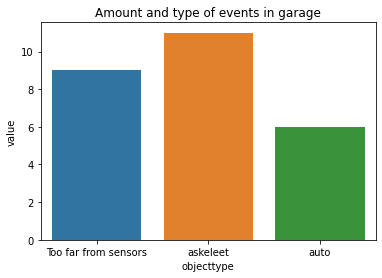

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=summa.index,y=summa['value'])
plt.title('Amount and type of events in garage')

In [34]:
df_events_drop=df_events_drop.sort_values(by=['timestamp'])

TypeError: sort_values() got an unexpected keyword argument 'orient'